# mario kart build optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sys
#sys.path.append('/Users/kalie/work/repos/optimal_mk8_build')
from tools import optimal_build


## Import build data

In [2]:
bodies_df = pd.read_csv('data/bodies.csv')
drivers_df = pd.read_csv('data/drivers.csv')
tires_df = pd.read_csv('data/tires.csv')
gliders_df = pd.read_csv('data/gliders.csv')

## Clean data

In [3]:
# Change Index
bodies_df = bodies_df.set_index('Body');
drivers_df = drivers_df.set_index('Driver');
tires_df = tires_df.set_index('Tire');
gliders_df = gliders_df.set_index('Glider');

In [4]:
# remove duplicates
# optional step, but reduces complexity
drivers_clean = drivers_df[~drivers_df.duplicated()]
bodies_clean = bodies_df[~bodies_df.duplicated()]
tires_clean = tires_df[~tires_df.duplicated()]
gliders_clean = gliders_df[~gliders_df.duplicated()]
print('Number of candidates: Before | After')
print('Drivers: ',len(drivers_df),'|',len(drivers_clean))
print('Bodies: ',len(bodies_df),'|',len(bodies_clean))
print('Tires: ',len(tires_df),'|',len(tires_clean))
print('Gliders: ',len(gliders_df),'|',len(gliders_clean))
print('Combintations: ',len(gliders_df)*len(tires_df)*len(bodies_df)*len(drivers_df),'|'
      ,len(gliders_clean)*len(tires_clean)*len(bodies_clean)*len(drivers_clean))

Number of candidates: Before | After
Drivers:  44 | 16
Bodies:  41 | 14
Tires:  22 | 9
Gliders:  15 | 4
Combintations:  595320 | 8064


In [5]:
bodies_clean.head(5)

,WG,AC,ON,OF,MT,SL,SW,SA,SG,TL,TW,TA,TG
Body,,,,,,,,,,,,,
Standard Kart,2,4,3,3,4,3,3,3,3,3,2,3,3
Pipe Frame,1,6,3,4,6,1,3,1,1,5,4,4,2
Mach 8,3,3,2,4,4,3,3,5,4,2,2,4,2
Steel Driver,4,1,1,3,2,4,5,2,0,1,5,1,1
Cat Cruiser,2,5,4,3,5,2,2,3,4,4,2,3,4


In [6]:
drivers_clean.head(5)

,WG,AC,ON,OF,MT,SL,SW,SA,SG,TL,TW,TA,TG
Driver,,,,,,,,,,,,,
Mario,6,2,4,2,2,6,6,6,6,4,4,4,4
Luigi,6,2,5,1,2,6,6,6,6,5,5,5,5
Peach,4,3,3,3,3,5,5,5,5,5,5,5,5
Toad,3,4,3,4,3,3,3,3,3,7,7,7,7
Toadette,2,5,4,2,4,2,2,2,2,7,7,7,7


In [7]:
tires_clean.head(5)

,WG,AC,ON,OF,MT,SL,SW,SA,SG,TL,TW,TA,TG
Tire,,,,,,,,,,,,,
Standard,2,4,2,5,3,2,3,2,3,3,3,3,3
Monster,4,2,3,7,2,2,2,2,1,0,1,0,1
Roller,0,6,0,4,6,0,3,0,3,4,4,4,4
Slim,2,2,4,1,2,3,2,4,2,4,4,3,4
Slick,3,1,4,0,0,4,0,4,0,2,0,2,1


In [8]:
gliders_clean.head(5)

,WG,AC,ON,OF,MT,SL,SW,SA,SG,TL,TW,TA,TG
Glider,,,,,,,,,,,,,
Super Glider,1,1,1,1,1,1,1,0,2,1,0,1,1
Cloud Glider,0,2,1,1,2,0,1,1,1,1,0,1,2
Wario Wing,2,1,2,0,1,1,0,1,2,1,1,0,1
Peach Parasol,1,2,2,0,2,0,0,1,1,1,1,0,2


## Definitions

* WG: Weight
* AC: Acceleration
* ON: On-Road traction
* OF: (Off-Road) Traction
* MT: Mini-Turbo
* SL: Ground Speed
* SW: Water Speed
* SA: Anti-Gravity Speed
* SG: Air Speed
* TL: Ground Handling
* TW: Water Handling
* TA: Anti-Gravity Handling
* TG: Air Handling

# Find optimal build for desired stats

In [9]:
mk_build = optimal_build(drivers_clean,bodies_clean,tires_clean,gliders_clean)

In [10]:
# input desired stats from list above here
# must only select 2
stats = ['MT','SL']

In [11]:
build = mk_build.find(stats)

Optimal Configuration for MT and SL
['Mario' 'Standard Kart' 'Roller' 'Super Glider']
Stats: MT and SL
[13 12]


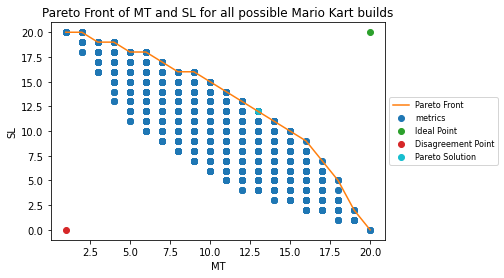

In [12]:
plt.figure()
plt.scatter(mk_build.stat1,mk_build.stat2,label='metrics')
plt.scatter(*mk_build.p2,label='Ideal Point',c='tab:green')
plt.scatter(*mk_build.p1,label='Disagreement Point',c='tab:red')
plt.plot(mk_build.p_front[:,0],mk_build.p_front[:,1],label='Pareto Front',c='tab:orange')
plt.scatter(mk_build.p_front[mk_build.opt_idx,0],mk_build.p_front[mk_build.opt_idx,1],c='tab:cyan',label='Pareto Solution')
plt.xlabel(mk_build.stats[0])
plt.ylabel(mk_build.stats[1])
plt.legend(fontsize=8,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pareto Front of '+mk_build.stats[0]+' and '+mk_build.stats[1]+' for all possible Mario Kart builds')
plt.show()